In [1]:
from pathlib import Path
from sklearn import preprocessing

import numpy as np
import pandas as pd
import work.prepare as wp

from work.prepare import assert_isDataFrame 

In [2]:
data_all = pd.read_csv(Path("work/data/001_winequality-red.csv"))
data = data_all[["residual sugar"]]

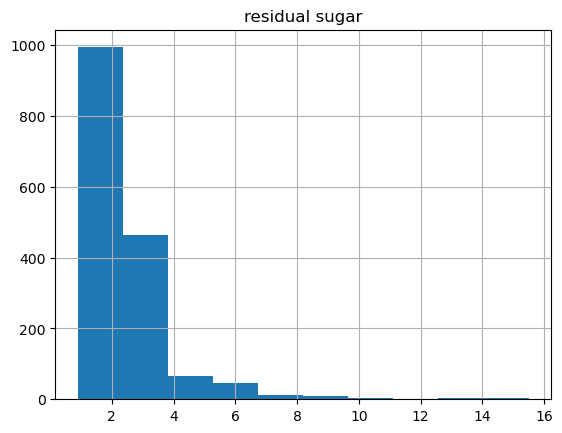

In [3]:
data.hist();

## CustomTransformer

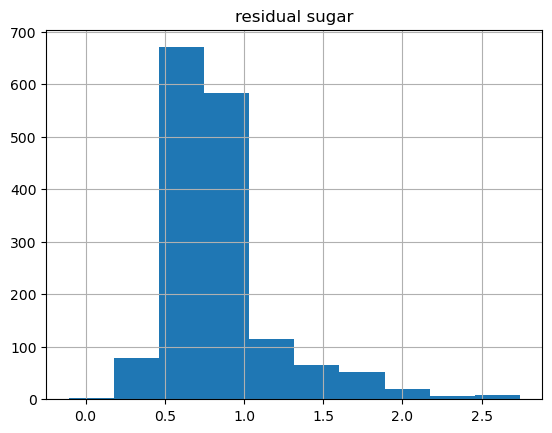

In [4]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomTransformer(BaseEstimator, TransformerMixin):

  def __init__(self, random_state=None):
    self.random_state = random_state
    
  def fit(self, X, y=None):
    return self

  def transform(self, X):
    return np.log(X)

  def inverse_transform(self, X):
    return np.exp(X)

tr = CustomTransformer()
x2 = tr.fit_transform(data)
x2.hist();

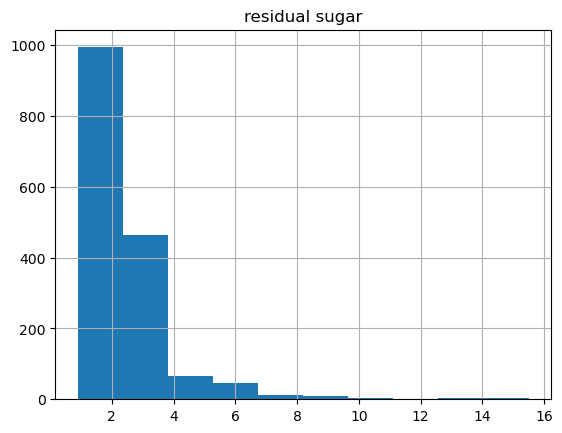

In [5]:
tr.inverse_transform(x2).hist();

## Function transformer

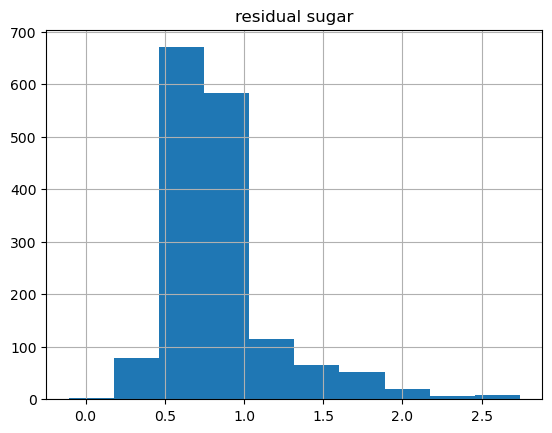

In [6]:
from sklearn.preprocessing import FunctionTransformer

tr3 = FunctionTransformer(np.log, inverse_func=np.exp)
x3 = tr3.fit_transform(data)
x3.hist();

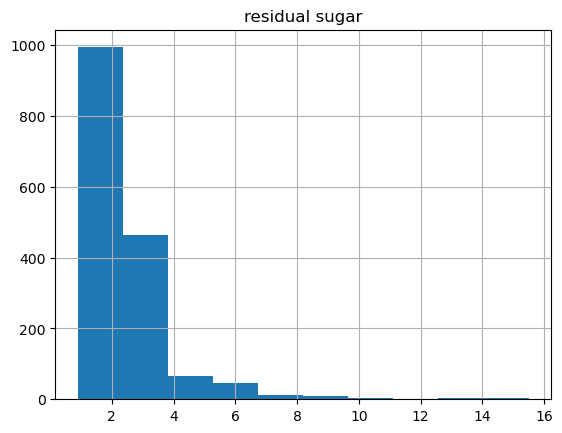

In [7]:
tr3.inverse_transform(x3).hist();

## Compare transformations

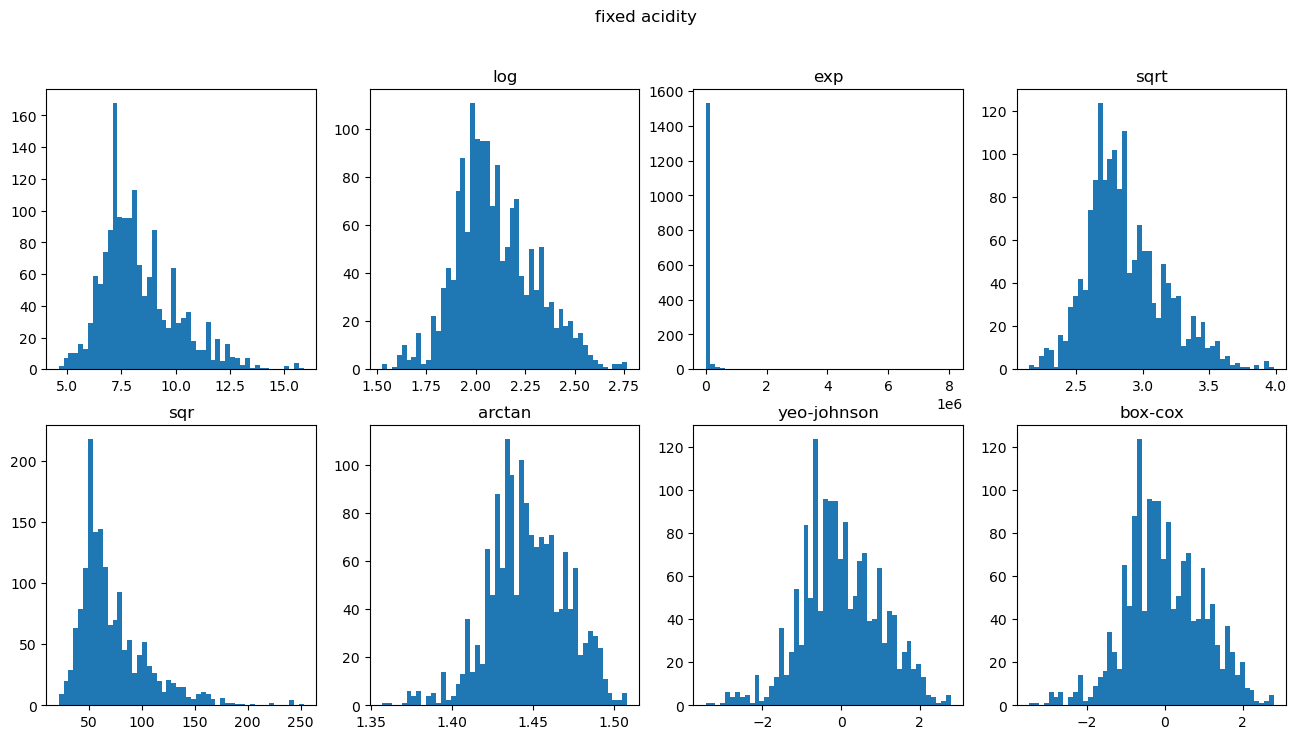

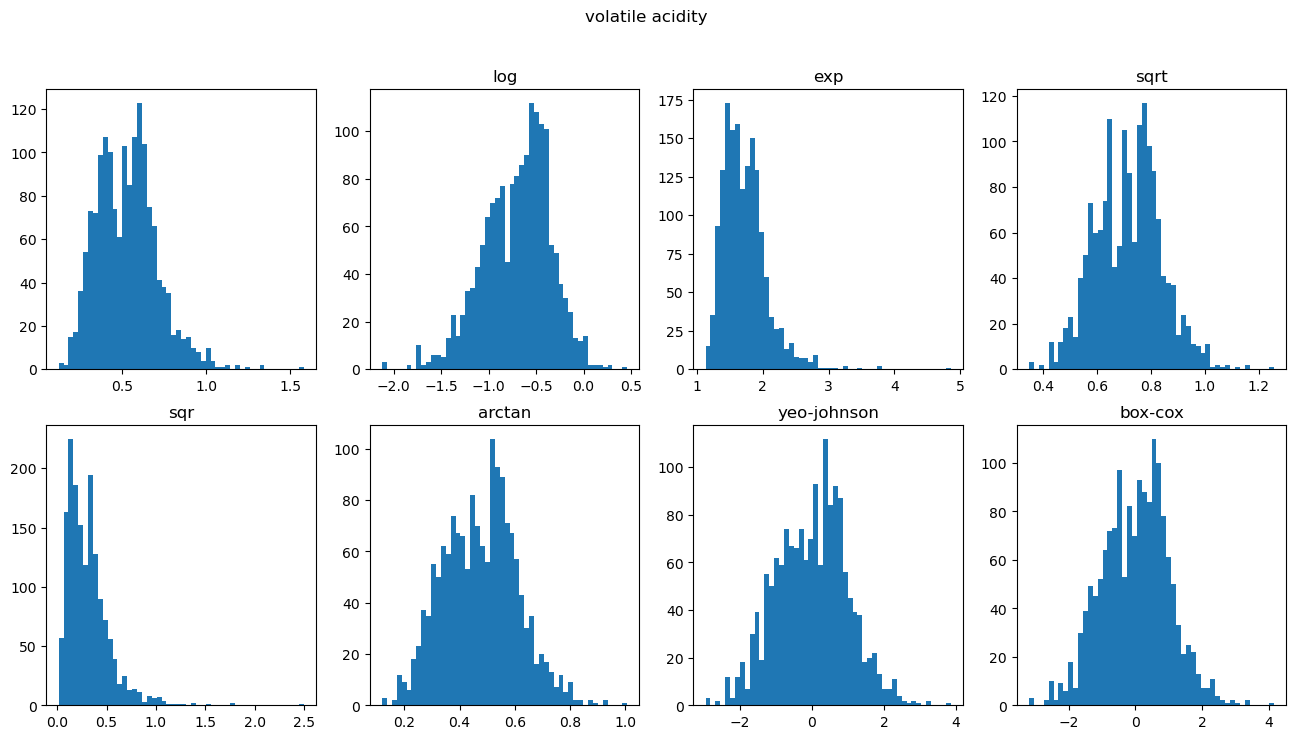

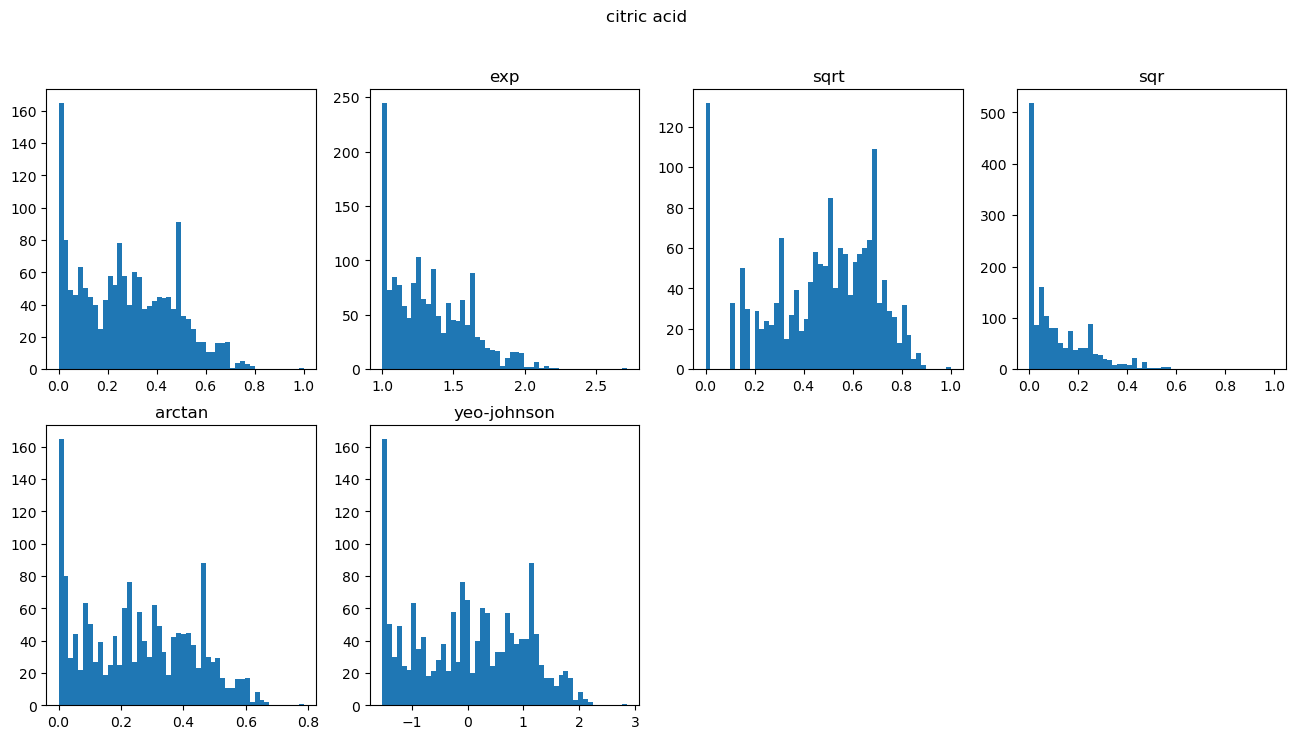

/home/jovyan/work/prepare.py:207: UserWarning: log: data set needs to be positive
  warnings.warn(f'{transformation_names[i]}: {validation_errors[i]}')
/home/jovyan/work/prepare.py:207: UserWarning: box-cox: data set needs to be positive
  warnings.warn(f'{transformation_names[i]}: {validation_errors[i]}')


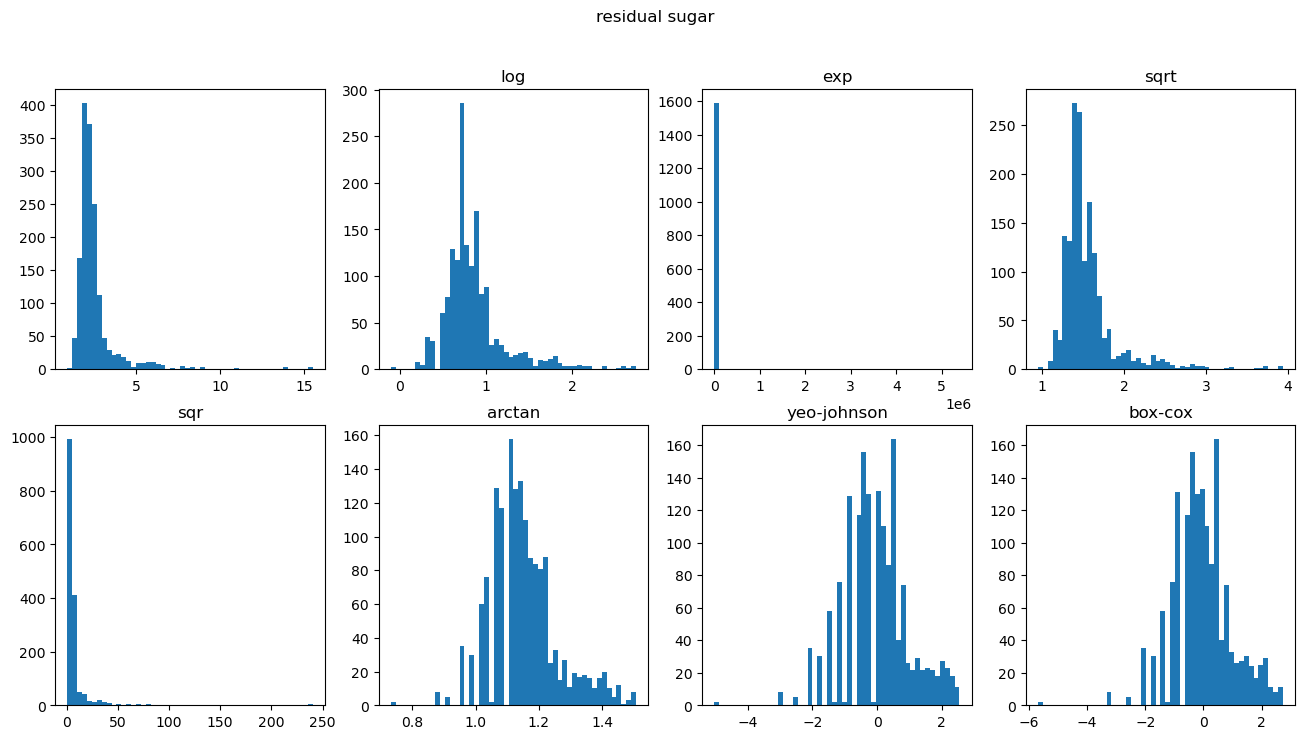

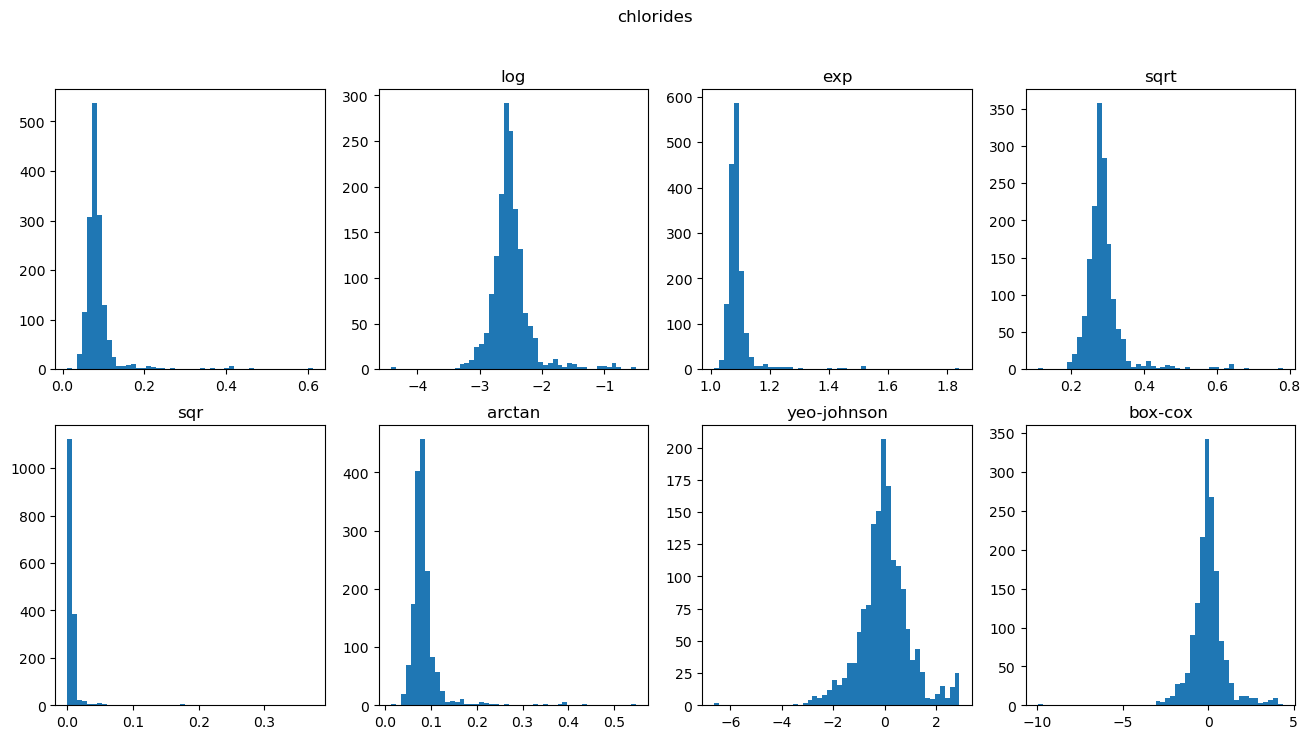

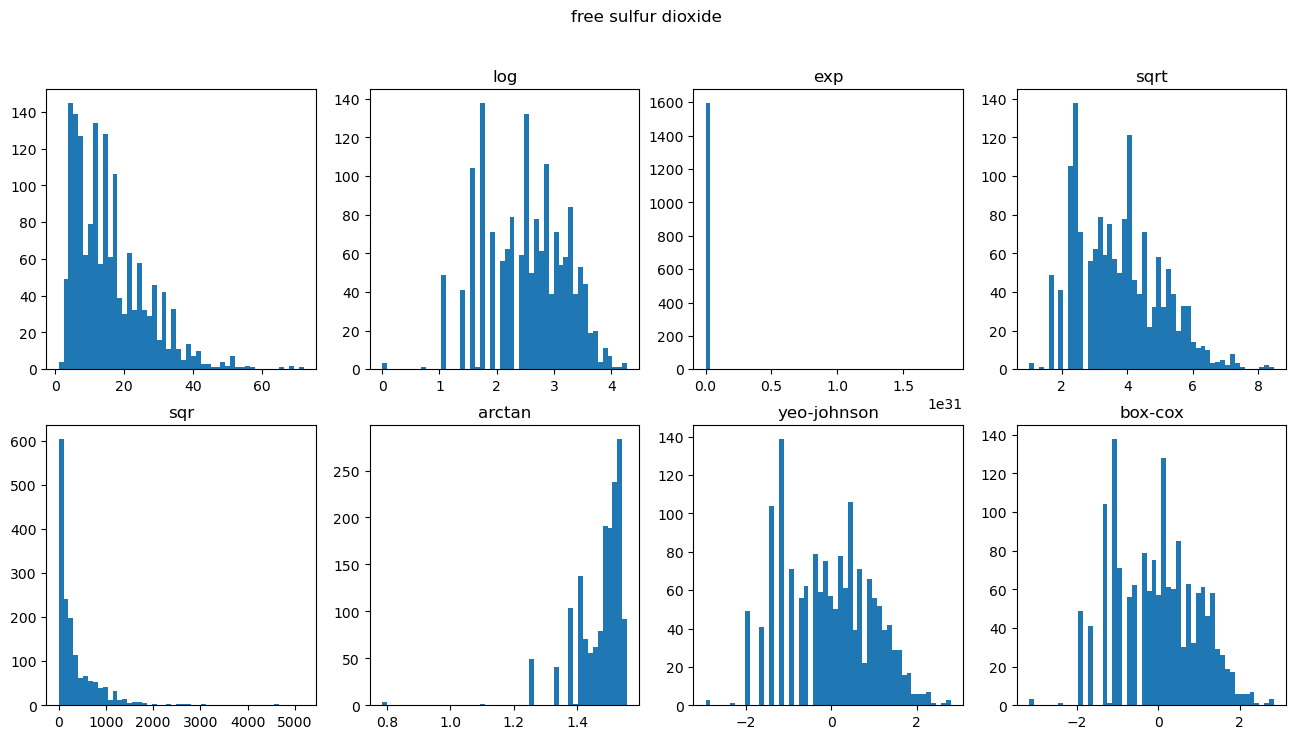

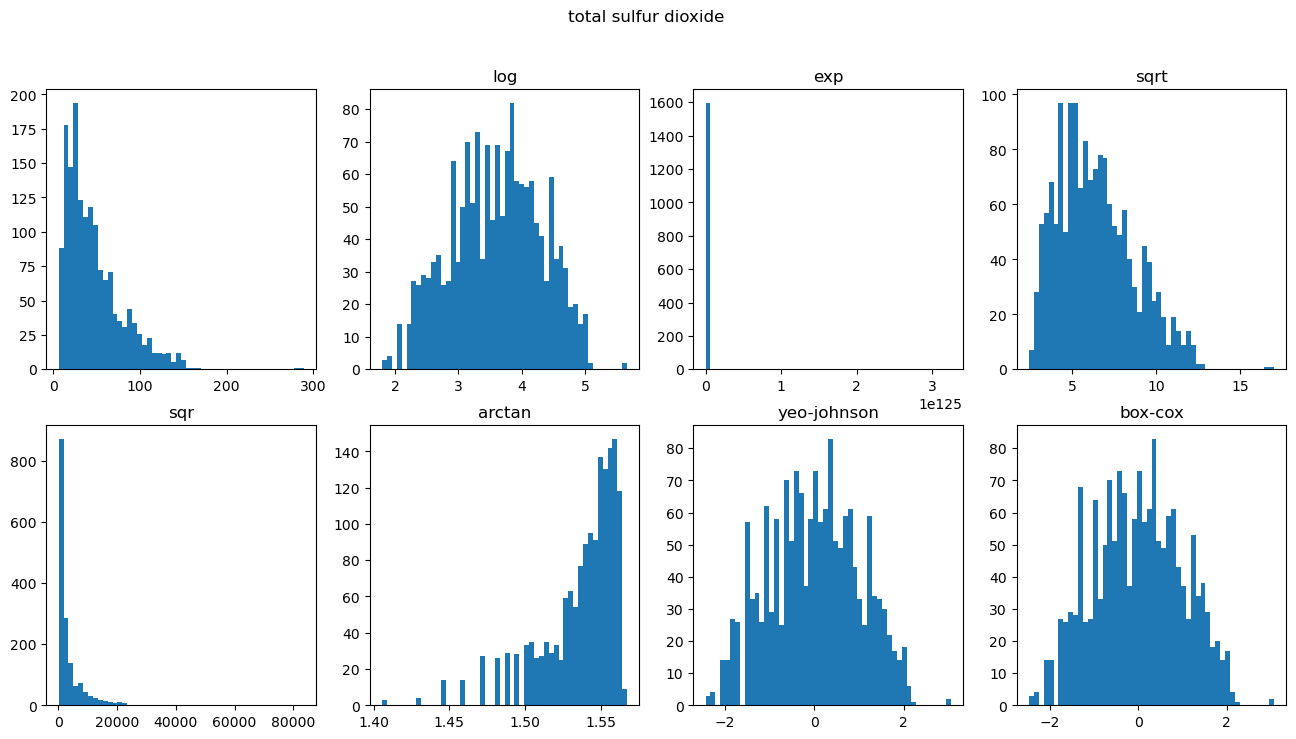

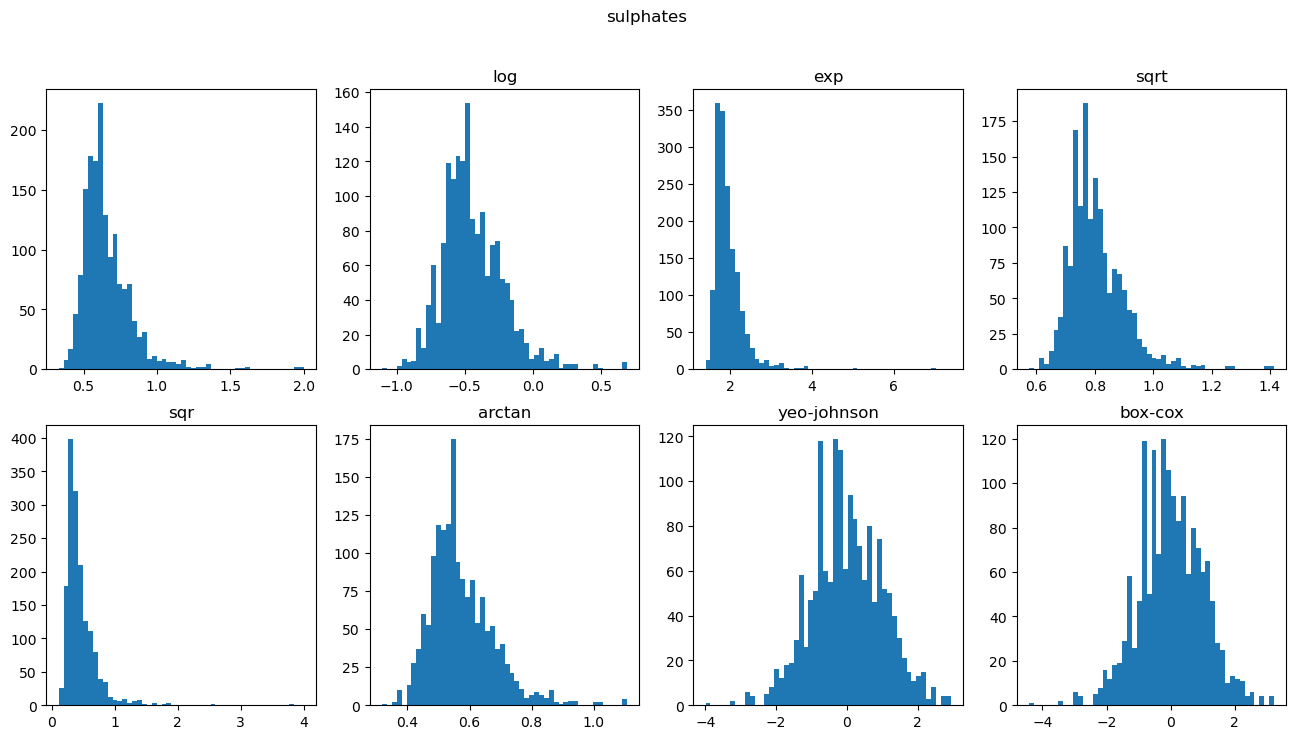

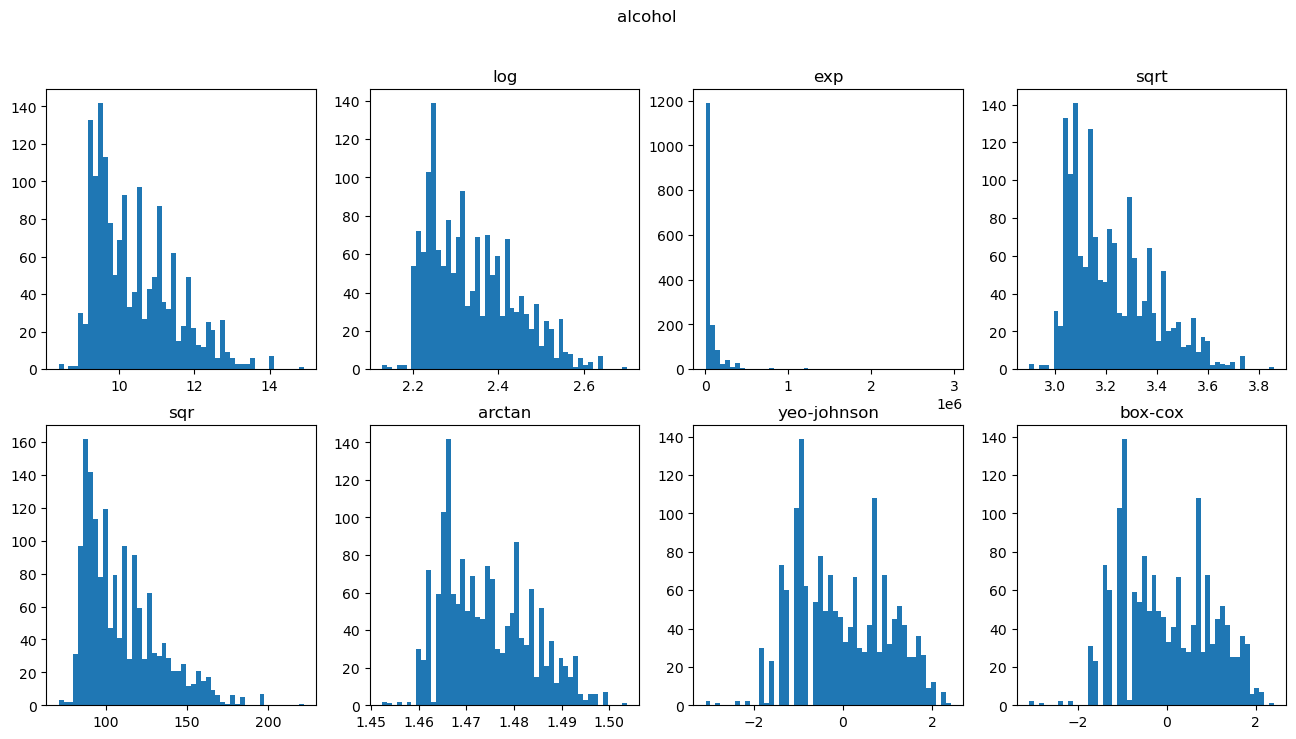

In [8]:
wp.transformations_compare(data_all, except_columns=["density", "pH", "quality"])